In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np #For scientific computing with Python

In [171]:
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [172]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/ShellLearn/emnist/"

In [173]:
All_train = Emnist_file_path + 'emnist-digits-train.csv'
All_test = Emnist_file_path + 'emnist-digits-test.csv'

In [174]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [175]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [176]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(239999, 785)
(39999, 785)


In [177]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (239999, 784)
y_train shape :  (239999, 1)


In [178]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (39999, 784)
y_test shape :  (39999, 1)


In [179]:
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

In [180]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (239999, 784)


In [181]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (39999, 784)


In [182]:
# Scale from 0 to 255
x_train /= 255
x_test /= 255

In [183]:
y_train = y_train - 1
y_test = y_test - 1

In [184]:
# Encode Categorical Integer Labels Using a One-Hot Scheme
# One-hot encode the labels

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [185]:
# Define the Model Architecture

# Define the model

model = Sequential()

model.add(Dense(512, activation='relu',input_shape=(784,)))

model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [186]:
# summarize the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [187]:
# Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam',

              metrics=['accuracy'])

In [188]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [189]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]



print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 13.0403%


In [190]:
# Train the model

checkpointer = ModelCheckpoint(filepath='digits_emnist.model.best1.hdf5',

                               verbose=1, save_best_only=True)

In [191]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10,

          validation_split=0.2, callbacks=[checkpointer],

          verbose=3, shuffle=True)

Train on 191999 samples, validate on 48000 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.06002, saving model to digits_emnist.model.best1.hdf5
Epoch 2/10

Epoch 00002: val_loss improved from 0.06002 to 0.04769, saving model to digits_emnist.model.best1.hdf5
Epoch 3/10

Epoch 00003: val_loss improved from 0.04769 to 0.04645, saving model to digits_emnist.model.best1.hdf5
Epoch 4/10

Epoch 00004: val_loss improved from 0.04645 to 0.04003, saving model to digits_emnist.model.best1.hdf5
Epoch 5/10

Epoch 00005: val_loss did not improve from 0.04003
Epoch 6/10

Epoch 00006: val_loss improved from 0.04003 to 0.03972, saving model to digits_emnist.model.best1.hdf5
Epoch 7/10

Epoch 00007: val_loss did not improve from 0.03972
Epoch 8/10

Epoch 00008: val_loss improved from 0.03972 to 0.03925, saving model to digits_emnist.model.best1.hdf5
Epoch 9/10

Epoch 00009: val_loss did not improve from 0.03925
Epoch 10/10

Epoch 00010: val_loss did not improve from 0.03925


In [192]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('digits_emnist.model.best1.hdf5')

In [193]:
# Save the best model

model.save('digits_eminst_mlp_model1.h5')

In [194]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

In [195]:
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 99.0975%
Test loss: 3.3790%


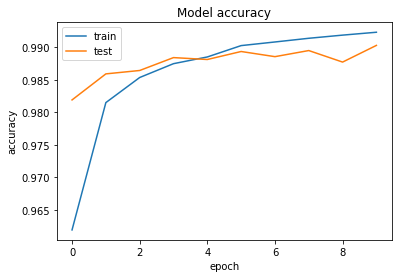

In [196]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

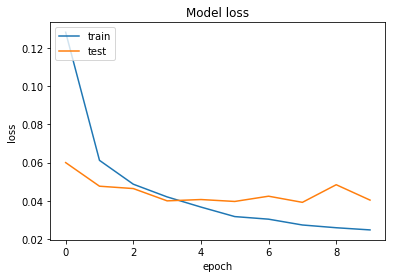

In [197]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [198]:
test = np.expand_dims(x_train[3], axis=0)
test.shape

(1, 784)

In [199]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted class: [5]


In [322]:
filepath = "uploads/test.png"

In [323]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [324]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [325]:

# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

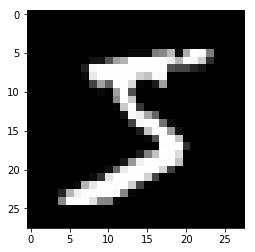

In [326]:

plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

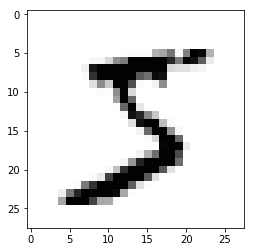

In [327]:



# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [328]:
# Make predictions
a = model.predict_classes(img)

In [329]:
a + 1 # As were doing y-1 before to overcome the error of num_classes

array([5], dtype=int64)

In [ ]:
# 1, 2, 4, 8...sometimes 5